a. Write a python script to fetch data of prices for the year 2020 (date wise from 1st
Jan’2020 to 31st Dec’2020) for district “Agra” of Uttar Pradesh from the data sources
mentioned in the data section (can take point b as a reference). Following is the
output schema expected:

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 93.0.4577
Get LATEST driver version for 93.0.4577
Driver [C:\Users\Admin\.wdm\drivers\chromedriver\win32\93.0.4577.63\chromedriver.exe] found in cache


In [3]:
driver.get("https://agmarknet.gov.in/default.aspx")

In [14]:
arrival_price = driver.find_element_by_id("ddlArrivalPrice")
s1 = Select(arrival_price)
s1.select_by_value("0")

commodity = driver.find_element_by_id("ddlCommodity")
s2 = Select(commodity)
s2.select_by_value("24")

state = driver.find_element_by_id("ddlState")
s3 = Select(state)
s3.select_by_value("UP")


In [17]:

district = driver.find_element_by_id("ddlDistrict")
s4 = Select(district)
s4.select_by_value("1")

market = driver.find_element_by_id("ddlMarket")
s5 = Select(market)
s5.select_by_value("0")

start_date = driver.find_element_by_id("txtDate")
start_date.clear()
start_date.send_keys("01-Jan-2020")


end_date = driver.find_element_by_id("txtDateTo")
end_date.clear()
end_date.send_keys("31-Dec-2020")


btn_go = driver.find_element_by_id("btnGo").click()



In [18]:
driver.find_element_by_id("cphBody_ButtonExcel").click()

b. Identify major markets for the district “Agra” and plot price patterns for each of
them. What patterns do you identify? 

In [19]:
import pandas as pd 
import matplotlib.pyplot as plt

In [57]:
df = pd.read_excel("agra data.xlsx")
df.head()

,"Min,Max,Modal Price from Uttar Pradesh,Agra[Potato] from 01-Jan-2020To31-Dec-2020 (Total-1827) (Total-1827)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30 00:00:00
2,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29 00:00:00
3,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28 00:00:00
4,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27 00:00:00


In [58]:
df.shape

(1828, 10)

In [59]:
df.columns

Index(['Min,Max,Modal Price from Uttar Pradesh,Agra[Potato] from 01-Jan-2020To31-Dec-2020 (Total-1827) (Total-1827)',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [60]:
df = df.iloc[: , 1:] #droppng 1st column

In [61]:
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30 00:00:00
2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29 00:00:00
3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28 00:00:00
4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27 00:00:00


In [62]:
df.columns = df.iloc[0]

In [63]:
df.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30 00:00:00
2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29 00:00:00
3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28 00:00:00
4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27 00:00:00


In [64]:
df = df.drop(0, axis=0)

In [65]:
df.head()

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,2020-12-30 00:00:00
2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-29 00:00:00
3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,2020-12-28 00:00:00
4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-27 00:00:00
5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,2020-12-26 00:00:00


In [68]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object', name=0)

In [66]:
df.isnull().sum()

0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [67]:
df.dtypes

0
District Name                object
Market Name                  object
Commodity                    object
Variety                      object
Grade                        object
Min Price (Rs./Quintal)      object
Max Price (Rs./Quintal)      object
Modal Price (Rs./Quintal)    object
Price Date                   object
dtype: object

#### Market Name by Modal Price

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

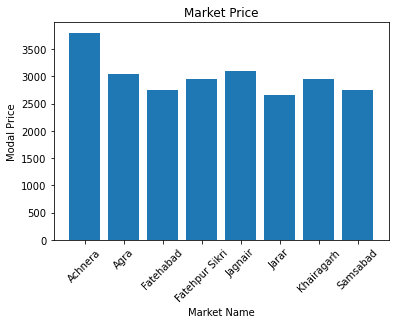

In [75]:
fig, ax = plt.subplots()
ax.bar(df['Market Name'], df['Modal Price (Rs./Quintal)'])

ax.set_title('Market Price')
ax.set_xlabel('Market Name')
ax.set_ylabel('Modal Price')
plt.xticks(rotation=45)

#### Market Name by Min Price

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

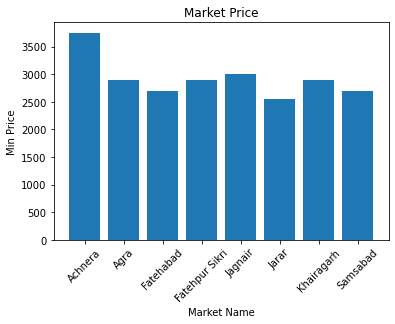

In [76]:
fig, ax = plt.subplots()
ax.bar(df['Market Name'], df['Min Price (Rs./Quintal)'])

ax.set_title('Market Price')
ax.set_xlabel('Market Name')
ax.set_ylabel('Min Price')
plt.xticks(rotation=45)

#### Market Name by Max Price

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

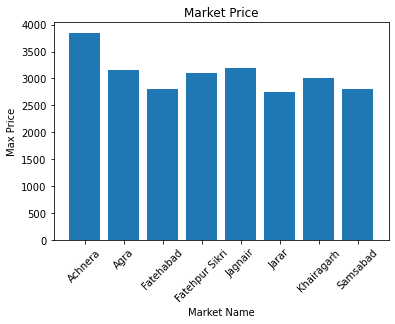

In [78]:
fig, ax = plt.subplots()
ax.bar(df['Market Name'], df['Max Price (Rs./Quintal)'])

ax.set_title('Market Price')
ax.set_xlabel('Market Name')
ax.set_ylabel('Max Price')
plt.xticks(rotation=45)

#### Variety by Modal Price

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

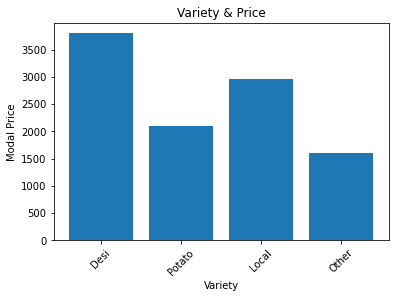

In [79]:
fig, ax = plt.subplots()
ax.bar(df['Variety'], df['Modal Price (Rs./Quintal)'])

ax.set_title('Variety & Price')
ax.set_xlabel('Variety')
ax.set_ylabel('Modal Price')
plt.xticks(rotation=45)

#### Variety by Min Price

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

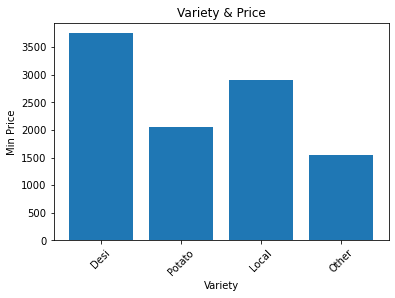

In [80]:
fig, ax = plt.subplots()
ax.bar(df['Variety'], df['Min Price (Rs./Quintal)'])

ax.set_title('Variety & Price')
ax.set_xlabel('Variety')
ax.set_ylabel('Min Price')
plt.xticks(rotation=45)

#### Variety by Max Price

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

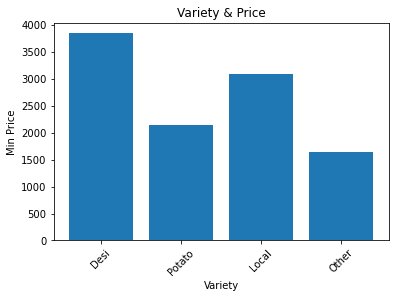

In [81]:
fig, ax = plt.subplots()
ax.bar(df['Variety'], df['Max Price (Rs./Quintal)'])

ax.set_title('Variety & Price')
ax.set_xlabel('Variety')
ax.set_ylabel('Min Price')
plt.xticks(rotation=45)